In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import factorize
%matplotlib inline

In [20]:
data = pd.read_csv('zomato_clean.csv')

In [21]:
data.head()

,Index,Restaurant Name,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1,Izakaya Kikufuji,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,3,Ooma,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,4,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Dropping the Index,Restaurant Name,City and Cuisines Columns

In [22]:
data.drop(['Index','Restaurant Name','City','Cuisines'],axis=1,inplace=True)

## 

Binary Encoding of the Has Table Booking

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9533 non-null   int64  
 1   Currency              9533 non-null   object 
 2   Has Table booking     9533 non-null   object 
 3   Has Online delivery   9533 non-null   object 
 4   Is delivering now     9533 non-null   object 
 5   Switch to order menu  9533 non-null   object 
 6   Price range           9533 non-null   int64  
 7   Aggregate rating      9533 non-null   float64
 8   Rating color          9533 non-null   object 
 9   Rating text           9533 non-null   object 
 10  Votes                 9533 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 819.4+ KB


In [24]:
data['Has Table booking'] = data['Has Table booking'].map({'Yes':1,'No':0})

In [25]:
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes':1,'No':0})

In [26]:
data['Is delivering now'] = data['Is delivering now'].map({'Yes':1,'No':0})

In [27]:
data['Switch to order menu'] = data['Switch to order menu'].map({'Yes':1,'No':0})

In [28]:
data.head()

,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,Excellent,314
1,1200,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,Excellent,591
2,4000,Botswana Pula(P),1,0,0,0,4,4.4,Green,Very Good,270
3,1500,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,Excellent,365
4,1500,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,Excellent,229


Label or Odinal Encoding

In [29]:
data['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [30]:
data['Rating color'] = data['Rating color'].map({'White':1,'Orange':2,'Yellow':3,'Red':4,'Dark Green':5})

In [31]:
data['Rating text'] = data['Rating text'].map({'Excellent':1,'Very Good':2,'Good':3,'Average':4,'Poor':5,'Not rated':6})

In [32]:
data['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

<Axes: >

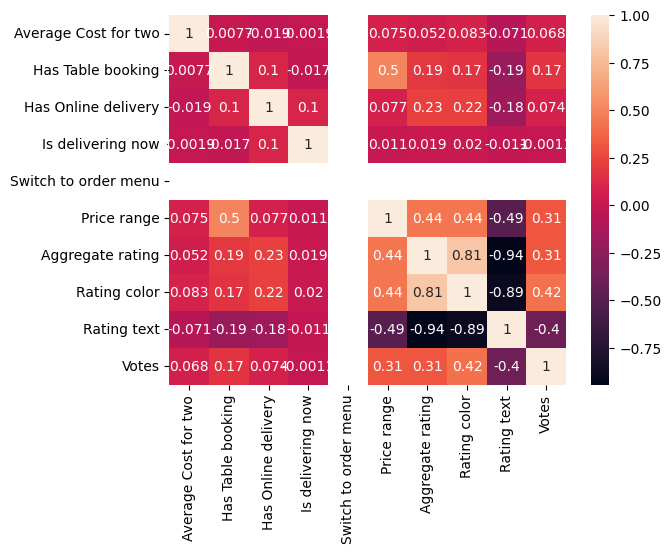

In [33]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

Checking the coorelation between the input categorical column Currency and the output column Votes

In [34]:
labels, categories = factorize(data['Currency'])
data['labels'] = labels
abs(data['Votes'].corr(data['labels']))*100

2.7542932723806692

Since the corrleation is very week we can drop the currecy column

In [35]:
data.drop(['Currency','labels'],axis=1,inplace=True)

In [36]:
data.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,5.0,1,314
1,1200,1,0,0,0,3,4.5,5.0,1,591
2,4000,1,0,0,0,4,4.4,NaN,2,270
3,1500,0,0,0,0,4,4.9,5.0,1,365
4,1500,1,0,0,0,4,4.8,5.0,1,229


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9533 non-null   int64  
 1   Has Table booking     9533 non-null   int64  
 2   Has Online delivery   9533 non-null   int64  
 3   Is delivering now     9533 non-null   int64  
 4   Switch to order menu  9533 non-null   int64  
 5   Price range           9533 non-null   int64  
 6   Aggregate rating      9533 non-null   float64
 7   Rating color          8457 non-null   float64
 8   Rating text           9533 non-null   int64  
 9   Votes                 9533 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 744.9 KB


Filling the missing values in Rating color column with median

In [38]:
data['Rating color']=data['Rating color'].fillna(value=data['Rating color'].median())

In [39]:
for i in data.columns :
    print("Number of missing values in {} is {}".format(i,data[i].isnull().sum()))

Number of missing values in Average Cost for two is 0
Number of missing values in Has Table booking is 0
Number of missing values in Has Online delivery is 0
Number of missing values in Is delivering now is 0
Number of missing values in Switch to order menu is 0
Number of missing values in Price range is 0
Number of missing values in Aggregate rating is 0
Number of missing values in Rating color is 0
Number of missing values in Rating text is 0
Number of missing values in Votes is 0


Splitting the data in the input and output features

In [40]:
X = data.drop('Votes',axis=1)
y = data['Votes']

Performing the Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
scaler.fit_transform(X)

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

array([[-6.28894650e-03,  2.68929304e+00, -5.88293018e-01, ...,
         1.40795370e+00,  3.23249661e+00, -2.14308474e+00],
       [-9.14188956e-05,  2.68929304e+00, -5.88293018e-01, ...,
         1.21017935e+00,  3.23249661e+00, -2.14308474e+00],
       [ 1.73439354e-01,  2.68929304e+00, -5.88293018e-01, ...,
         1.14425456e+00, -1.43422560e-01, -1.41182170e+00],
       ...,
       [-6.39259532e-02, -3.71844936e-01, -5.88293018e-01, ...,
         6.82781062e-01,  9.81883831e-01, -6.80558659e-01],
       [-6.70247170e-02, -3.71844936e-01, -5.88293018e-01, ...,
         8.80555419e-01, -1.43422560e-01, -1.41182170e+00],
       [-7.10531100e-02, -3.71844936e-01, -5.88293018e-01, ...,
         8.80555419e-01, -1.43422560e-01, -1.41182170e+00]])

Splliting the data into train and test split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Importing the necessary library for the algorithim

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

Creating the dictionary of all the regression algorithimns 

In [45]:
algo_dict={
    'LinearRegressor':LinearRegression(),
    'SupportVector' :SVR(),
    'DecisionTree' :DecisionTreeRegressor(),
    'RandomForest' :RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Xgboost':XGBRegressor()
}

Fitting all the models on the machine learning algorithim

In [50]:
for i in algo_dict :
    model = algo_dict.get(i)
    model.fit(X_train,y_train)


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

Predicting all the models output with the help of machine learning algorithims

In [52]:
for i in algo_dict :
    model = algo_dict.get(i)
    print("The prediction of the {} model is {}".format(i,model.predict(X_test)))

c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

The prediction of the LinearRegressor model is [-22.83035491  90.70740359 473.72752096 ... 342.21144809 365.31967768
 -36.25695668]
The prediction of the SupportVector model is [26.91116194 30.403495   28.21577046 ... 34.81807855 28.65199366
 26.91083852]
The prediction of the DecisionTree model is [ 16.11111111  31.91666667 258.         ... 100.         560.5
   0.784     ]
The prediction of the RandomForest model is [ 15.94668214  31.9975242  456.64966667 ... 118.4055119  580.22466667
   0.79493455]
The prediction of the AdaBoost model is [  55.38560112   55.38560112  559.35833333 ... 1138.79310345  559.35833333
   55.38560112]
The prediction of the Xgboost model is [ 18.040535   49.608036  289.83786   ... 342.09515   647.74115
  -1.1820523]


c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:757: FutureWarning:

Checking the accuracy of the each model

In [47]:
dict={
    'a':1,
    'b':2,
    'c':3,
    'd':4
}


In [48]:
for i in dict :
    val = dict.get(i)
    print("The value against the {} is {}".format(i,val))

The value against the a is 1
The value against the b is 2
The value against the c is 3
The value against the d is 4
